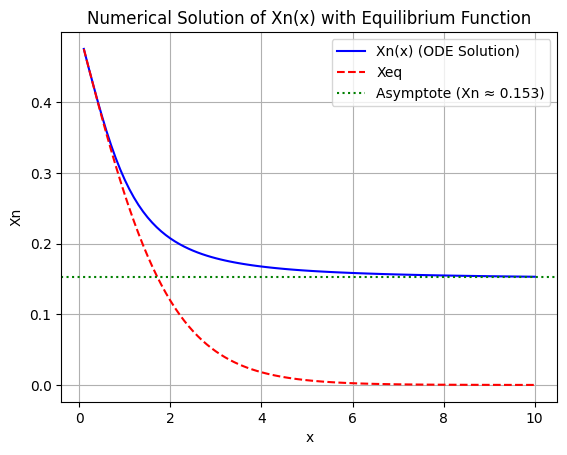

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define constants
tau_n = 885.7  # Neutron mean lifetime (in seconds)
Hx1 = 1.13
constant = 255 / (tau_n * Hx1)  # Pre-factor

# Define the ODE
def dXn_dx(x, Xn):
    exp = np.exp(-x)
    term1 = exp - Xn * (1 + exp)
    term2 = (12 + (6 * x) + (x**2)) / x**4
    return constant * term1 * term2

# Initial conditions
Xn0 = 0.5  # Initial value of Xn

# Define the range of x
x = np.linspace(0.1, 10, 100)

# Solve the ODE
solution = solve_ivp(dXn_dx, t_span=(0.07, max(x)), y0=[Xn0], method="RK45", dense_output=True, t_eval=x)

# Extract solution
x_vals = solution.t
Xn_vals = solution.y[0]

# Define the equilibrium function
Xeq = 1 / (1 + np.exp(x))

# Asymptotic value (last value of Xn)
asymptotic_value = Xn_vals[-1]

# Plot the solutions
plt.plot(x_vals, Xn_vals, label="Xn(x) (ODE Solution)", color="blue")
plt.plot(x, Xeq, label="Xeq", color="red", linestyle="--")
plt.axhline(y=asymptotic_value, color="green", linestyle=":", label=f"Asymptote (Xn ≈ {asymptotic_value:.3f})")
plt.xlabel("x")
plt.ylabel("Xn")
plt.title("Numerical Solution of Xn(x) with Equilibrium Function")
plt.legend()
plt.grid()
plt.show()
